# María José Fonseca - Análisis de Datos (Remoto Semana 3)
## MCMC 
#### (Lo primero que haré es corregir mis gráficas pasadas, y al final haré la tarea como tal)
Para una sola cadena:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
#Puntos para ajustar:

m_ = 7
b_ = 5
lon = 20
x_ = np.linspace(0, 4, lon)
y_ = m_ * x_ + b_
err_ = []

for k in range(lon):
    y_[k] += np.random.normal(0, 0.3)
    err_.append(.2)

#plt.plot(x_, y_)
x_ = np.array([x_])
y_ = np.array([y_])
err_ = np.array([err_])

In [3]:
modelo = lambda args: args[0]*x_ + args[1] 

def likelihood(args):
    lk = (y_-modelo([args[0], args[1]]))**2/(err_**2)
    return lk.sum()

In [62]:
def markov(m_0, b_0):
    pasos = 0
    sigma_m = .01
    sigma_b = .1
    m_old = m_0
    b_old = b_0
    lnlk_in = -1*likelihood([m_old, b_old])
        
    while pasos <=N:
        
        #lnlk_in = -1*likelihood([m_in, b_in])
        
        #for j in range(1, 2):
        m_new = np.random.normal(m_arr[len(m_arr)-1], sigma_m)
        b_new = np.random.normal(b_arr[len(b_arr)-1], sigma_b)
        like = -1*likelihood([m_new, b_new])
        m_old, b_old = m_new, b_new
        if like>lnlk_in:
            lnlk_in = like
            m_arr.append(m_old)
            b_arr.append(b_old)
        elif lnlk_in-like<-math.log(random.uniform(0,1)):
            lnlk_in = like
            m_arr.append(m_old)
            b_arr.append(b_old)
        pasos += 1
        
        
        
        
    values = [m_new, b_new]
    return values


Text(0.5, 1.0, 'Ajuste con Cadenas de Markov (Recta: 7x+5)')

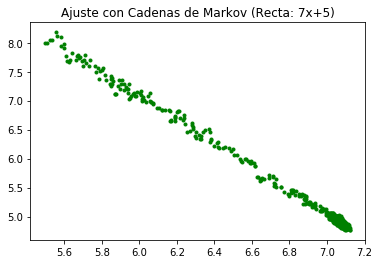

In [63]:
N = 3000

m_in = 5.5
b_in = 8
lnlk_in = -1*likelihood([m_in, b_in])

m_arr = []
b_arr = []

m_arr.append(m_in)
b_arr.append(b_in)

res = markov(m_in, b_in)
m_arr, b_arr
plt.plot(m_arr, b_arr, 'g.')
plt.title('Ajuste con Cadenas de Markov (Recta: 7x+5)')
#print('m: ' + str(res[0]) + ' b: ' + str(res[1]))
#print(likelihood(res))


Implementado para múltimples cadenas y fracción de aceptación:

In [4]:
def markov(m_0, b_0):
    pasos = 0
    sigma_m = .01
    sigma_b = .1
    m_old = m_0
    b_old = b_0
    NewValue = 0
    lnlk_in = -1*likelihood([m_in[i], b_in[i]])
        
    while pasos <=N:
        
        
        #for j in range(1, 2):
        m_new = np.random.normal(m_arr[i][len(m_arr[i])-1], sigma_m)
        b_new = np.random.normal(b_arr[i][len(b_arr[i])-1], sigma_b)
        like = -1*likelihood([m_new, b_new])
        #m_old, b_old = m_new, b_new
        if like>lnlk_in:
            lnlk_in = like
            m_old, b_old = m_new, b_new
            m_arr[i].append(m_old)
            b_arr[i].append(b_old)
            NewValue += 1
        elif lnlk_in-like<-math.log(random.uniform(0,1)):
            lnlk_in = like
            m_old, b_old = m_new, b_new
            m_arr[i].append(m_old)
            b_arr[i].append(b_old)
            NewValue += 1
        else:
            m_arr[i].append(m_old)
            b_arr[i].append(b_old)
        pasos += 1
    
    FraccAcep.append(NewValue/N)
    values = [m_new, b_new]
    return values

Fraccion de Aceptacion :0.3454
Fraccion de Aceptacion :0.3446
Fraccion de Aceptacion :0.341
Fraccion de Aceptacion :0.3452
Fraccion de Aceptacion :0.3448


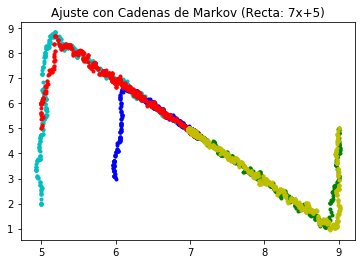

In [8]:
m_arr = [[], [], [], [], []]
b_arr = [[], [], [], [], []]
res = [[], [], [], [], []]
FraccAcep = []
m_in = []
b_in = []

N = 5000

random.seed(18)

for i in range(5):
    m_in.append(random.randint(m_-3, m_+3))
    b_in.append(random.randint(b_-3, b_+3))

#m_in = [-5, 11, 7, 10, 3]
#b_in = [3, 7, 8, 1, 3]
for i in range(5):
    m_arr[i].append(m_in[i])
    b_arr[i].append(b_in[i])

#print(m_arr, b_arr)

color = ['c.', 'g.', 'b.', 'r.', 'y.']
#Ciclo para ejecutar todas las cadenas:
for i in range(5):
    res[i] = markov(m_in[i], b_in[i])
    #print('Cadena ' + str(i + 1) + ': ')
    plt.plot(m_arr[i], b_arr[i], color[i])
    plt.title('Ajuste con Cadenas de Markov (Recta: 7x+5)')
    print('Fraccion de Aceptacion :' + str(FraccAcep[i]))
    #print(likelihood(res[i]))
#len(FraccAcep)

Fraccion de Aceptacion :0.3454
Fraccion de Aceptacion :0.3446
Fraccion de Aceptacion :0.341
Fraccion de Aceptacion :0.3452
Fraccion de Aceptacion :0.3448


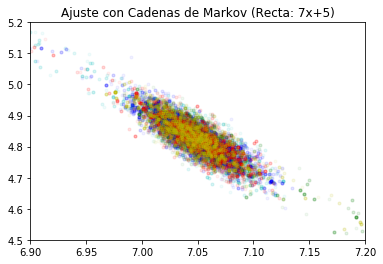

In [18]:
for i in range(5):
    #res[i] = markov(m_in[i], b_in[i])
    #print('Cadena ' + str(i + 1) + ': ')
    plt.plot(m_arr[i], b_arr[i], color[i], alpha=.05)
    plt.ylim((4.5,5.2))
    plt.xlim((6.9, 7.2))
    plt.title('Ajuste con Cadenas de Markov (Recta: 7x+5)')
    print('Fraccion de Aceptacion :' + str(FraccAcep[i]))

#### Inicia Semana 3
##### Lo que quedó de tarea para realizar fue implementar el prior plano y el posterior, hacer histogramas para $m$, añadir gráficos de inspección, añadir cálculo de valor medio e intervalos de confianza y aplicar el criterio de convergencia Gelman-Rubin.

In [4]:
def prior(m_n , b_n):
    m_inf = m_-3
    m_sup = m_+3
    b_inf = b_-3
    b_sup = b_+3
    
    if m_n > m_inf and m_n < m_sup:
        pm = 1/(m_sup-m_inf)
    else:
        pm = -1*np.inf
    if b_n > b_inf and b_n < b_sup:
        pb = 1/(b_sup-b_inf)
    else:
        pb = -1*np.inf
    
    return pm + pb

def post(m_n, b_n): 
    lnlike = -1*likelihood([m_n, b_n])
    return prior(m_n, b_n) -1*likelihood([m_n, b_n])
#print(-1*likelihood([7, 3])+prior(7, 3))
#print(post(7, 3))

In [5]:
def markov(m_0, b_0):
    pasos = 0
    sigma_m = .01
    sigma_b = .1
    m_old = m_0
    b_old = b_0
    NewValue = 0
    
    lnlk_in = -1*likelihood([m_in[i], b_in[i]])
    post_in = lnlk_in + prior(m_in[i], b_in[i])
        
    while pasos <=N:
        
        m_new = np.random.normal(m_arr[i][len(m_arr[i])-1], sigma_m)
        b_new = np.random.normal(b_arr[i][len(b_arr[i])-1], sigma_b)
        #m_old, b_old = m_new, b_new
        posterior = post(m_new, b_new)
        if posterior > post_in:
            post_in = posterior
            m_old, b_old = m_new, b_new
            m_arr[i].append(m_old)
            b_arr[i].append(b_old)
            NewValue += 1
        elif post_in-posterior<-math.log(random.uniform(0,1)):
            post_in = posterior
            m_old, b_old = m_new, b_new
            m_arr[i].append(m_old)
            b_arr[i].append(b_old)
            NewValue += 1
        else:
            m_arr[i].append(m_old)
            b_arr[i].append(b_old)
        pasos += 1
    
    FraccAcep.append(NewValue/N)
    values = [m_new, b_new]
    return values

Fraccion de Aceptacion :0.3481
Fraccion de Aceptacion :0.3429
Fraccion de Aceptacion :0.3237


C:\Users\Usuario\AppData\Local\Continuum\miniconda3\envs\ENV1\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


Fraccion de Aceptacion :0.322
Fraccion de Aceptacion :0.3068


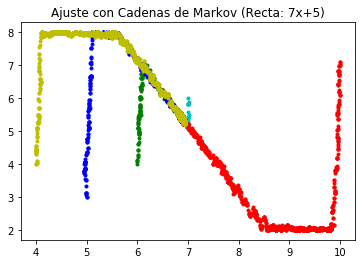

In [6]:
m_arr = [[], [], [], [], []]
b_arr = [[], [], [], [], []]
res = [[], [], [], [], []]
FraccAcep = []
m_in = []
b_in = []

N = 10000

random.seed(9)

for i in range(5):
    m_in.append(random.randint(m_-3, m_+3))
    b_in.append(random.randint(b_-3, b_+3))

#m_in = [-5, 11, 7, 10, 3]
#b_in = [3, 7, 8, 1, 3]
for i in range(5):
    m_arr[i].append(m_in[i])
    b_arr[i].append(b_in[i])

#print(m_arr, b_arr)

color = ['c.', 'g.', 'b.', 'r.', 'y.']
#Ciclo para ejecutar todas las cadenas:
for i in range(5):
    res[i] = markov(m_in[i], b_in[i])
    #print('Cadena ' + str(i + 1) + ': ')
    plt.plot(m_arr[i], b_arr[i], color[i])
    plt.title('Ajuste con Cadenas de Markov (Recta: 7x+5)')
    print('Fraccion de Aceptacion :' + str(FraccAcep[i]))
    #print(likelihood(res[i]))
#len(FraccAcep)

Fraccion de Aceptacion :0.3481
Fraccion de Aceptacion :0.3429
Fraccion de Aceptacion :0.3237
Fraccion de Aceptacion :0.322
Fraccion de Aceptacion :0.3068


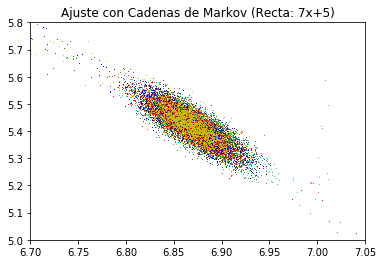

In [28]:
color2 = ['c,', 'g,', 'b,', 'r,', 'y,']
for i in range(5):
    #res[i] = markov(m_in[i], b_in[i])
    #print('Cadena ' + str(i + 1) + ': ')
    plt.plot(m_arr[i], b_arr[i], color2[i], alpha=.8)
    plt.ylim((5,5.8))
    plt.xlim((6.7, 7.05))
    plt.title('Ajuste con Cadenas de Markov (Recta: 7x+5)')
    print('Fraccion de Aceptacion :' + str(FraccAcep[i]))

Histogramas para $m$ y $b$ para cada cadena:

Text(0.5, 1.0, 'Histogramas para $m$ en la región de alta densidad')

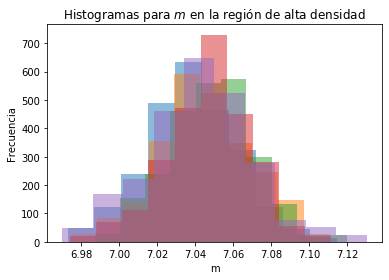

In [112]:
for i in range(5):
    plt.hist(m_arr[i][2500:5000], bins=10, alpha=.5)
    plt.xlabel('m')
    plt.ylabel('Frecuencia')
plt.title('Histogramas para $m$ en la región de alta densidad')

Text(0.5, 1.0, 'Histogramas para $b$ en la región de alta densidad')

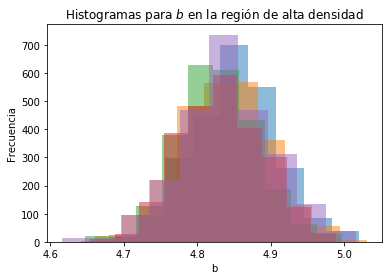

In [113]:
for i in range(5):
    plt.hist(b_arr[i][2500:5000], bins=10, alpha=.5)
    plt.xlabel('b')
    plt.ylabel('Frecuencia')
plt.title('Histogramas para $b$ en la región de alta densidad')

Gráficas de $m$ y $b$ respecto al número de iteraciones: 

Text(0.5, 1.0, 'Valores de $m$ por iteraciones')

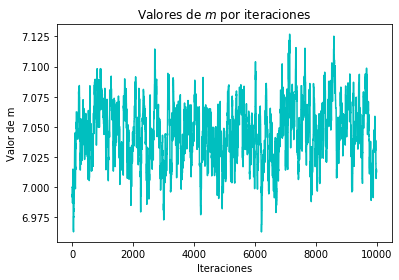

In [114]:
N_vec = []
for i in range(1, N+1):
    N_vec.append(i)

plt.plot(N_vec, m_arr[0][0:N], 'c')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de m')
plt.title('Valores de $m$ por iteraciones')

Text(0.5, 1.0, 'Valores de $b$ por iteraciones')

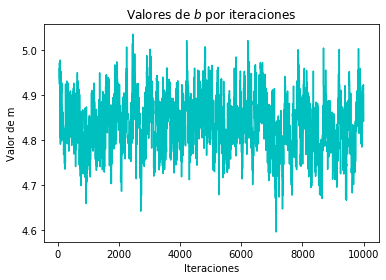

In [115]:
plt.plot(N_vec[50:N], b_arr[0][50:N], 'c')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de m')
#plt.ylim((4.5, 5.5))
plt.title('Valores de $b$ por iteraciones')

#### Cálculos de valor medio e intervalos de confianza.
##### Al inicio, había realizado 5,000 iteraciones, y los valores parecía converger. Para estar segura de que eliminaba por completo el burning, utilicé 10,000 iteraciones y mis estimaciones serán a partir de la mitad de ellas. Primero, voy a graficar esos valores para asegurarme de que efectivamente, se obtienen valores en la región de alta densidad.

Fraccion de Aceptacion :0.3438
Fraccion de Aceptacion :0.345
Fraccion de Aceptacion :0.3431
Fraccion de Aceptacion :0.3247
Fraccion de Aceptacion :0.3213


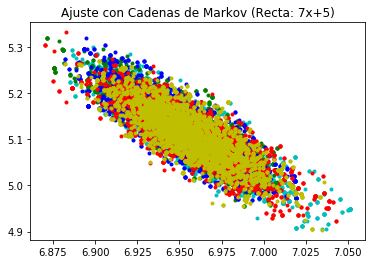

In [17]:
for i in range(5):
    #res[i] = markov(m_in[i], b_in[i])
    plt.plot(m_arr[i][5001:], b_arr[i][5001:], color[i])
    plt.title('Ajuste con Cadenas de Markov (Recta: 7x+5)')
    print('Fraccion de Aceptacion :' + str(FraccAcep[i]))
    #print(likelihood(res[i]))
#len(FraccAcep)

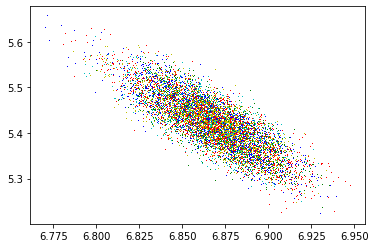

In [8]:
m_med = [0, 0, 0, 0, 0]
b_med = [0, 0, 0, 0, 0]
m_nb = [[], [], [], [], []]
b_nb = [[], [], [], [], []]
for i in range(5):
    m_nb[i] = m_arr[i][5001:] 
    b_nb[i] = b_arr[i][5001:]
    plt.plot(m_nb[i], b_nb[i], color2[i])
#len(m_arr[i])
#prueba = [5, 3, 2]
#prueba = np.array(prueba)
#print(prueba.mean())

In [9]:
m_nb = np.array(m_nb)
b_nb = np.array(b_nb)

for i in range(5):
    m_med[i] = m_nb[i].mean()
    b_med[i] = b_nb[i].mean()
    print('Cadena ' + str(i + 1) + ' m media: ' + str(m_med[i]) + ' b media: ' + str(b_med[i]))

m_med = np.array(m_med)
b_med = np.array(b_med)

m_media = m_med.mean()
b_media = b_med.mean()

print('Para las 5 cadenas, los valores medios de m y b son ' + str(m_media) + ' y ' + str(b_media))

Cadena 1 m media: 6.865582359689687 b media: 5.425421939878915
Cadena 2 m media: 6.869508675272467 b media: 5.415804870893251
Cadena 3 m media: 6.866578318776438 b media: 5.423214901459387
Cadena 4 m media: 6.866709910019424 b media: 5.419077912484401
Cadena 5 m media: 6.865401468006475 b media: 5.423220871478227
Para las 5 cadenas, los valores medios de m y b son 6.866756146352898 y 5.421348099238836


In [24]:
m_global = []
b_global = []

for i in range(5):
    for j in range(len(m_nb[0])):
        m_global.append(m_nb[i][j])
        b_global.append(b_nb[i][j])

m_global = np.array(m_global)
b_global = np.array(b_global)

#b_global.mean()
print('Los valores medios de m y b son ' + str(m_global.mean()) + ' y ' + str(b_global.mean()))

#Intervalos de confianza

#68%, calculamos percentiles 16 y 84.
print('\n Intervalo de confianza 1 -> 68%:')
print('m está entre ' + str(np.percentile(m_global, 16)) + ' y ' + str(np.percentile(m_global, 84)))
print('b está entre ' + str(np.percentile(b_global, 16)) + ' y ' + str(np.percentile(b_global, 84)))

#95%, calculamos percentiles 2.5 y 97.5.
print('\n Intervalo de confianza 2 -> 95%:')
print('m está entre ' + str(np.percentile(m_global, 2.5)) + ' y ' + str(np.percentile(m_global, 97.5)))
print('b está entre ' + str(np.percentile(b_global, 16)) + ' y ' + str(np.percentile(b_global, 84)))

#99.7%, calculamos percentiles .15 y 99.85.
print('\n Intervalo de confianza 3 -> 99.7%:')
print('m está entre ' + str(np.percentile(m_global, .15)) + ' y ' + str(np.percentile(m_global, 99.7)))
print('b está entre ' + str(np.percentile(b_global, 16)) + ' y ' + str(np.percentile(b_global, 84)))

Los valores medios de m y b son 6.866756146352898 y 5.421348099238836

 Intervalo de confianza 1 -> 68%:
m está entre 6.8427955969365915 y 6.891184055224581
b está entre 5.362743677219278 y 5.478191148538179

 Intervalo de confianza 2 -> 95%:
m está entre 6.818397201778212 y 6.912305537510105
b está entre 5.362743677219278 y 5.478191148538179

 Intervalo de confianza 3 -> 99.7%:
m está entre 6.792140085466496 y 6.928878277394568
b está entre 5.362743677219278 y 5.478191148538179


#### Gelman Rubin

In [31]:
def si2(k, kmed):
    aux = 0
    for it in k:
        aux += (it-kmed)**2
    return (1/5000)*aux          

In [50]:
m_global.mean()
sisq_m = [] #Array que contiene s_i^2 para cada cadena

#for item in m_nb:
 #   print item.mean()
 #   sisq.append(si2(item, ))
for i in range(5):
    sisq_m.append(si2(m_nb[i], m_nb[i].mean()))

sisq_m = np.array(sisq_m)
sisq_m = sisq_m.sum() #Ahora contiene la suma del s_i^2 de cada cadena

ssq_m = (1/5)*sisq_m #Valor de s^2
print('El valor de s^2 para m es ' + str(ssq_m))

El valor de s^2 para m es 0.0002910794970076309


In [51]:
b_global.mean()
sisq_b = [] #Array que contiene s_i^2 para cada cadena

#for item in m_nb:
 #   print item.mean()
 #   sisq.append(si2(item, ))
for i in range(5):
    sisq_b.append(si2(b_nb[i], b_nb[i].mean()))

sisq_b = np.array(sisq_b)
sisq_b = sisq_b.sum() #Ahora contiene la suma del s_i^2 de cada cadena

ssq_b = (1/5)*sisq_b #Valor de s^2
print('El valor de s^2 para b es ' + str(ssq_b))

El valor de s^2 para b es 0.0016622971505052373


In [83]:
def bn_aux(loc, glob):
    aux = 0
    for l in loc:
        aux += (l-glob)**2
    return aux

In [86]:
medias_m = []
medias_b = []

for i in range(5):
    medias_m.append(m_nb[i].mean())
    medias_b.append(b_nb[i].mean())

bn_m = (1/4)*bn_aux(medias_m, m_global.mean()) #b/n para el parámetro m
bn_b = (1/4)*bn_aux(medias_b, b_global.mean()) #b/n para b

In [89]:
sigma_sq_m = (5000/5001)*ssq_m**2 + bn_m
sigma_sq_b = (5000/5001)*ssq_b**2 + bn_b

r_m = np.sqrt(sigma_sq_m/ssq_m)
r_b = np.sqrt(sigma_sq_b/ssq_b)

print('Para m, R= ' + str(r_m))
print('Para b, R= ' + str(r_b))

Para m, R= 0.09791160070659743
Para b, R= 0.1029846729421828
